In [2]:
import numpy as np
import csv
import collections
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.pyplot import figure

In [3]:
def build_dict_from_csv():
    fabricante = []
    general_dict = {}
    with open("VendaCarros.csv",  newline='',encoding='utf8') as csv_file:
        csv_reader = csv.reader(csv_file)
        for val,row in enumerate(csv_reader):
            if val ==0:
                for i in row:
                    general_dict[i]= [] 
            general_dict["Fabricante"].append(row[0])
            general_dict["Estado"].append(row[1])
            general_dict["ValorVenda"].append(row[2])
            general_dict["ValorCusto"].append(row[3])
            general_dict["TotalDesconto"].append(row[4])
            general_dict["CustoEntrega"].append(row[5])
            general_dict["CustoMaoDeObra"].append(row[6])
            general_dict["Ano"].append(row[7])
            general_dict["Lucro"].append(row[8])

        for k,v in general_dict.items():
            del general_dict[k][0]
    return general_dict

In [4]:
def check_both(data: dict, x:tuple, y:tuple):
    """
    checks two classes and return occurences of x and y between them.
    data: dict. dict with csv data in lists
    x: tuple. First value: the dict key, second value: item to be searched
    y: tuple. First value: the dict key, second value: item to be searched
    returns: the ocurrence of the items on x and y simultaneously
    """
    occurence = 0
    assert len(data[x[0]]) == len(data[y[0]]), "categories have different sizes."
    for i in range(len(data[x[0]])):
        if (data[x[0]][i]==x[1]) and (data[y[0]][i]==y[1]):
            occurence+=1
    return occurence

def check_occurence(data: dict, search_for:str , sub_classes:list):
    x = []
    for i in range(len(data[search_for])):
        current_row = [elem[i] for elem in data.values()]
        if set(sub_classes).issubset(current_row):
            x.append(data[search_for][i])
    return x

Lucro de Sao paulo para Carros Aston Martin em 2016: R$ 184820
Lucro de Sao paulo para Carros Aston Martin em 2017: R$ 682045
Lucro de Sao paulo para Carros Aston Martin em 2018: R$ 117765
Lucro de Sao paulo para Carros Aston Martin em 2019: R$ 673747
Lucro de Sao paulo para Carros Aston Martin em 2020: R$ 732018


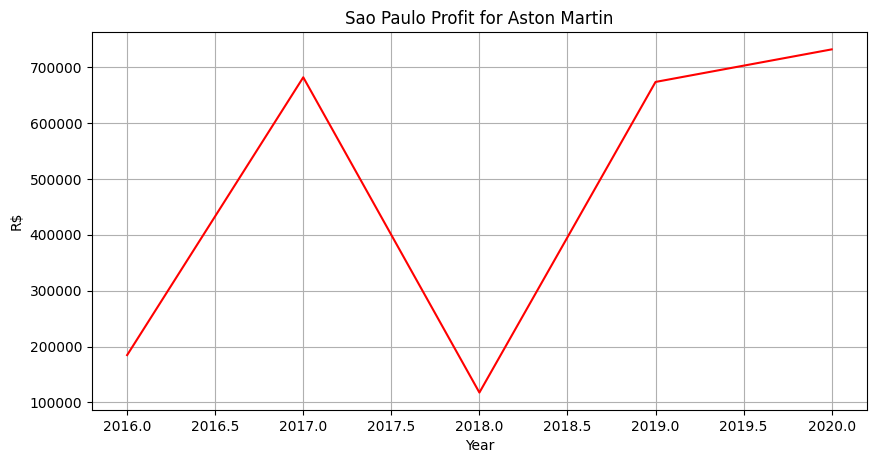

In [5]:
general_dict = build_dict_from_csv()
sp_sales = []
for i in range(2016,2021):
    x = check_occurence(data=general_dict, search_for= "Lucro", sub_classes=["São Paulo","Aston Martin",str(i)])
    x = np.array(x).astype(np.int64)
    total_value = np.sum(x)
    sp_sales.append(total_value)
    print(f"Lucro de Sao paulo para Carros Aston Martin em {i}: R$ {total_value}")

figure(figsize=(10, 5), dpi=100)
plt.title("Sao Paulo Profit for Aston Martin")
plt.grid()
plt.xlabel("Year")
plt.ylabel("R$")
plt.plot(np.linspace(2016, 2020, len(sp_sales)),sp_sales, color ="red")
plt.show()

<Figure size 500x500 with 0 Axes>

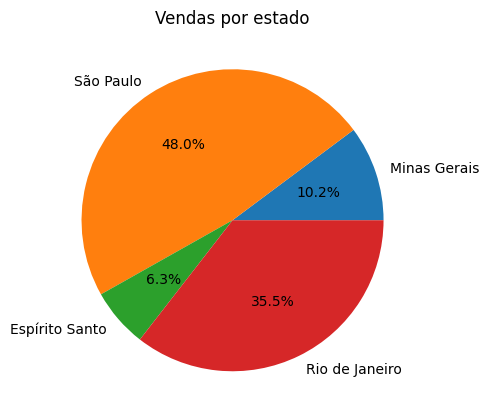

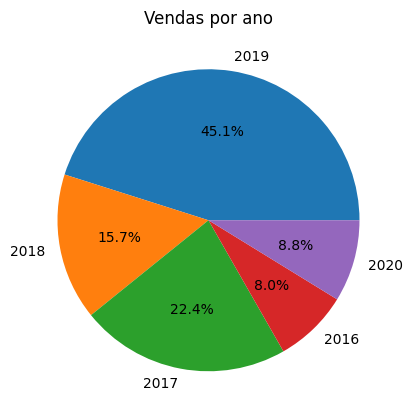

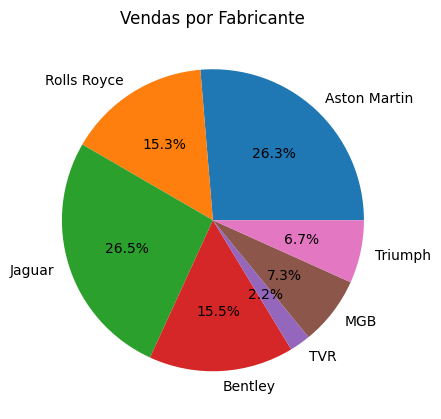

In [6]:
#Estado, Ano e Fabricante
figure(figsize=(5, 5), dpi=100)
estado = Counter(general_dict["Estado"])
ano = Counter(general_dict["Ano"])
fabricante = Counter(general_dict["Fabricante"])

figure(figsize=(5, 5), dpi=100)
plt.pie(estado.values(), labels=estado.keys(),autopct='%1.1f%%')
plt.title("Vendas por estado")
plt.show() 

figure(figsize=(5, 5), dpi=100)
plt.pie(ano.values(), labels=ano.keys(),autopct='%1.1f%%')
plt.title("Vendas por ano")
plt.show()

figure(figsize=(5, 5), dpi=100)
plt.pie(fabricante.values(), labels=fabricante.keys(),autopct='%1.1f%%')
plt.title("Vendas por Fabricante")
plt.show()

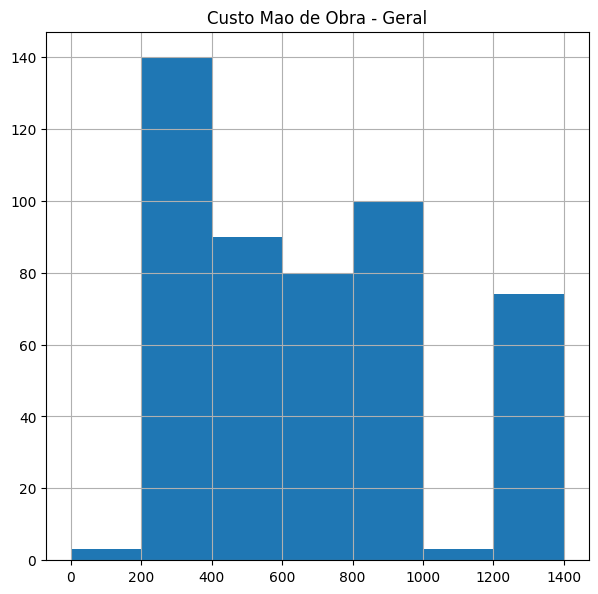

custo medio mao de obra - Minas Gerais: R$ 745.04
custo medio mao de obra - Espírito Santo: R$ 715.9354838709677
custo medio mao de obra - São Paulo: R$ 852.736170212766
custo medio mao de obra - Rio de Janeiro: R$ 446.14367816091954

Histogramas CustoMaoDeObra por estado:


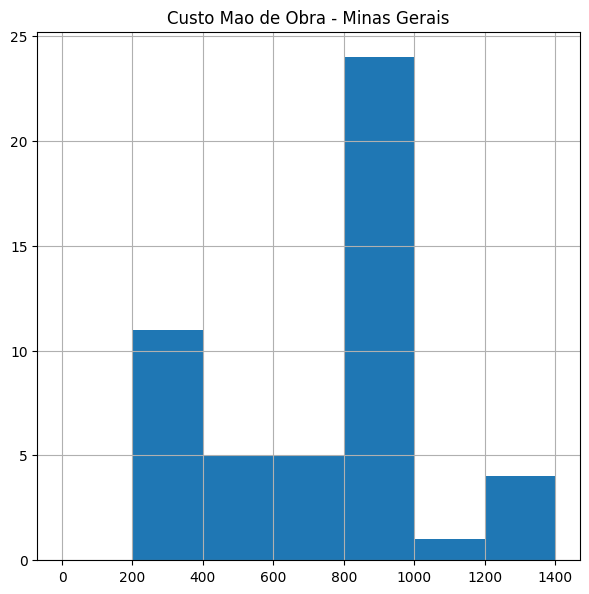

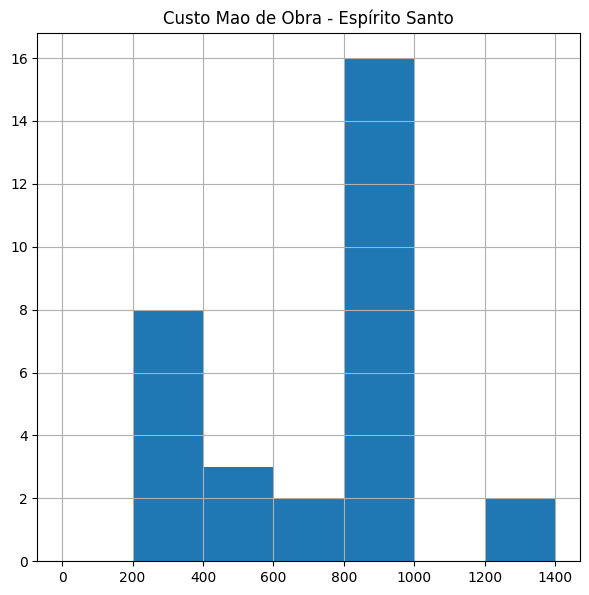

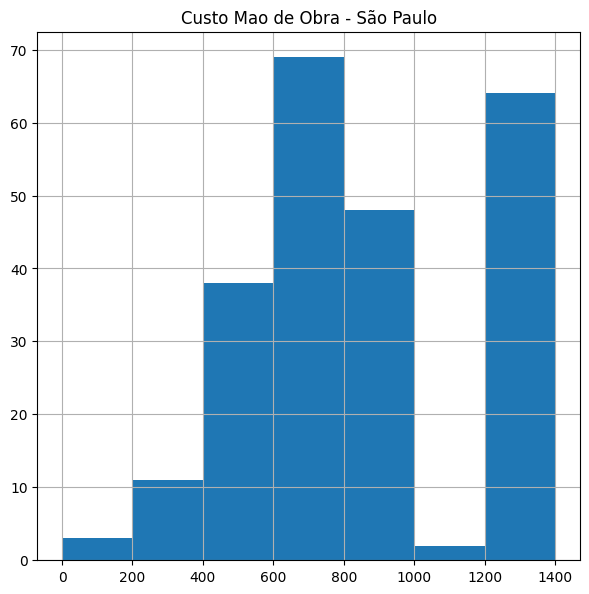

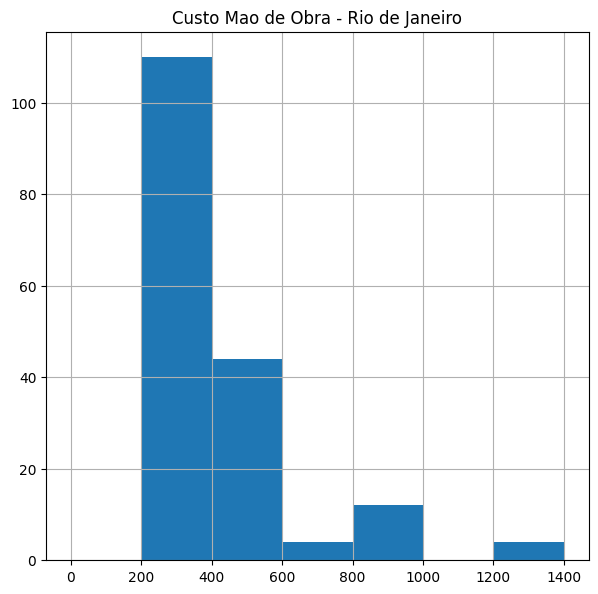

In [129]:
# CUSTO MÃO DE OBRA
# OVERALL
from collections import Counter
#print(Counter(maoDeObra))
#from scipy.stats import norm
figure(figsize=(7,7), dpi=100)
maoDeObra = sorted([int(x) for x in general_dict["CustoMaoDeObra"]])
bin = np.arange(0,1500,200)
plt.hist(maoDeObra, bins=bin)
plt.grid()
plt.title("Custo Mao de Obra - Geral")
x = np.arange(0, 1400, 10)
# plt.plot(x, norm.pdf(x, np.mean(maoDeObra), np.std(maoDeObra)))
# plt.legend(["normal","histograma"])
plt.show()

# Per state
cost_per_state = {}
for state in list(set(general_dict["Estado"])):
    cost_per_state[state] = np.array(check_occurence(data=general_dict, search_for= "CustoMaoDeObra", sub_classes=[state]))
    print(f"custo medio mao de obra - {state}: R$ {np.mean(np.array(cost_per_state[state]).astype(np.int64))}")
    
print("\nHistogramas CustoMaoDeObra por estado:")
for state in list(set(general_dict["Estado"])):
    figure(figsize=(7, 7), dpi=100)
    plt.hist(sorted([int(x) for x in cost_per_state[state]]), bins=bin)
    plt.grid()
    plt.title(f"Custo Mao de Obra - {state}")
    plt.show()
    
    